In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/MINI PROJECT/NetflixOriginals.csv",encoding = "ISO-8859-1")
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


In [ ]:
df.describe()

,Runtime,IMDB Score
count,584.000000,584.000000
mean,93.577055,6.271747
std,27.761683,0.979256
min,4.000000,2.500000
25%,86.000000,5.700000
50%,97.000000,6.350000
75%,108.000000,7.000000
max,209.000000,9.000000


***1-In which language were the long-running films created according to the dataset? Make a visualization.***

In [ ]:
df_temp=df.groupby(['Runtime','Title','Language']).mean().sort_values(by='Runtime', ascending=False).reset_index().iloc[:,:3]
#df_temp

<ipython-input-12-9ba3af689b5e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_temp=df.groupby(['Runtime','Title','Language']).mean().sort_values(by='Runtime', ascending=False).reset_index().iloc[:,:3]


In [ ]:
fig = px.box(df, x= 'Runtime', hover_data = df[['Title','Language']])
fig.update_traces(quartilemethod="inclusive")
fig.show()

***2. Which genre has the highest IMDB rating among movies shot in English?***

In [ ]:
top_imdb_english = df[df['Language'] == "English"]
top_imdb_english = top_imdb_english.groupby(['Language','Genre','Title']).mean().sort_values(by=["IMDB Score"],ascending=False)[:10]
top_imdb_english

<ipython-input-22-7597670012e7>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Runtime  \
Language Genre                                Title                                                 
English  Documentary                          David Attenborough: A Life on Our Planet       83.0   
         One-man show                         Springsteen on Broadway                       153.0   
         Concert Film                         Ben Platt: Live from Radio City Music Hall     85.0   
                                              Taylor Swift: Reputation Stadium Tour         125.0   
         Documentary                          Cuba and the Cameraman                        114.0   
                                              Dancing with the Birds                         51.0   
                                              Seaspiracy                                     89.0   
         Animation/Christmas/Comedy/Adventure Klaus                                          97.0   
         Documentary                          Disclosure: Trans Lives on Screen             107.0   
                                              13th                                          100.0   

                                                                                          IMDB Score  
Language Genre                                Title                                                   
English  Documentary                          David Attenborough: A Life on Our Planet           9.0  
         One-man show                         Springsteen on Broadway                            8.5  
         Concert Film                         Ben Platt: Live from Radio City Music Hall         8.4  
                                              Taylor Swift: Reputation Stadium Tour              8.4  
         Documentary                          Cuba and the Cameraman                             8.3  
                                              Dancing with the Birds                             8.3  
                                              Seaspiracy                                         8.2  
         Animation/Christmas/Comedy/Adventure Klaus                                              8.2  
         Documentary                          Disclosure: Trans Lives on Screen                  8.2  
                                              13th                                               8.2

***3. The correlation between IMDB score and 'Runtime'***

In [ ]:
df[['IMDB Score','Runtime']].corr()

,IMDB Score,Runtime
IMDB Score,1.000000,-0.040896
Runtime,-0.040896,1.000000


In [ ]:
fig = px.scatter(df, x='IMDB Score', y='Runtime')
fig.show()

***4. Top 10 Genre by IMDB Score***

<ipython-input-20-88f745cc0f99>:15: UserWarning:

FixedFormatter should only be used together with FixedLocator



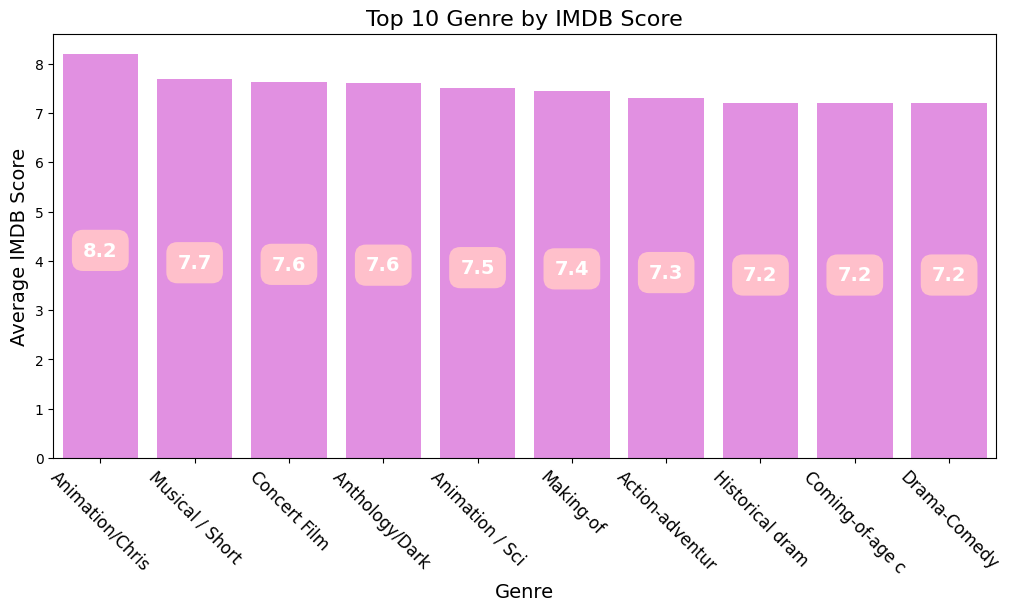

In [ ]:
df_temp=df.groupby(['Genre']).mean(['IMDB rating']).sort_values(by='IMDB Score', ascending=False).reset_index().iloc[:10,:]

fig, ax = plt.subplots(1,1, figsize = (10, 6), constrained_layout = True)
ax = sns.barplot(x = 'Genre', y = 'IMDB Score', data = df_temp, color = 'violet')

for i in ax.patches:
    ax.text(x = i.get_x() + i.get_width()/2, y = i.get_height()/2,
            s = f"{round(i.get_height(),1)}",
            ha = 'center', size = 14, weight = 'bold', rotation = 0, color = 'white',
            bbox=dict(boxstyle="round,pad=0.5", fc='pink', ec="pink", lw=2))


ax.set_xlabel('Genre', fontsize=14)
ax.set_ylabel('Average IMDB Score', fontsize=14)
ax.set_xticklabels([i[:15] for i in df_temp['Genre'].unique()], fontsize=12, rotation = -45 )
plt.title('Top 10 Genre by IMDB Score', fontsize=16);

***5. outlier data in the data set?***

In [ ]:
fig = px.scatter(x=df['Runtime'], y=df['Title'])
fig.show()